# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
df_origin = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
print(df_origin.head())

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106


In [6]:
df_hw = df_origin.pivot_table(index=['ID', 'Date'], columns='Element', values='Data_Value').reset_index() 
df_hw.sort_values("Date", inplace=True)

# Take out date 02-29?
df_hw= df_hw[~df_hw['Date'].str.contains('02-29')]

df_hw['MMDD'] = df_hw['Date'].str[-5:]

#print(dnew)
df_hw['Date'] = pd.to_datetime(df_hw['Date'])

df_2015 =  df_hw[(df_hw['Date'] >= '2015-01-01') & (df_hw['Date'] <= '2015-12-31')]
df_hw = df_hw[(df_hw['Date'] >= '2005-01-01') & (df_hw['Date'] <= '2014-12-31')]

#df_hw['year'] = df_hw['Date'].dt.year
#df_hw['month'] = df_hw['Date'].dt.month
#df_hw['day'] = df_hw['Date'].dt.day

print(df_hw.head())

Element           ID       Date   TMAX  TMIN   MMDD
0        USC00200032 2005-01-01   67.0 -28.0  01-01
46528    USC00207308 2005-01-01  150.0 -44.0  01-01
39208    USC00205563 2005-01-01   28.0 -28.0  01-01
35252    USC00205451 2005-01-01  156.0 -44.0  01-01
34594    USC00205450 2005-01-01  128.0 -33.0  01-01


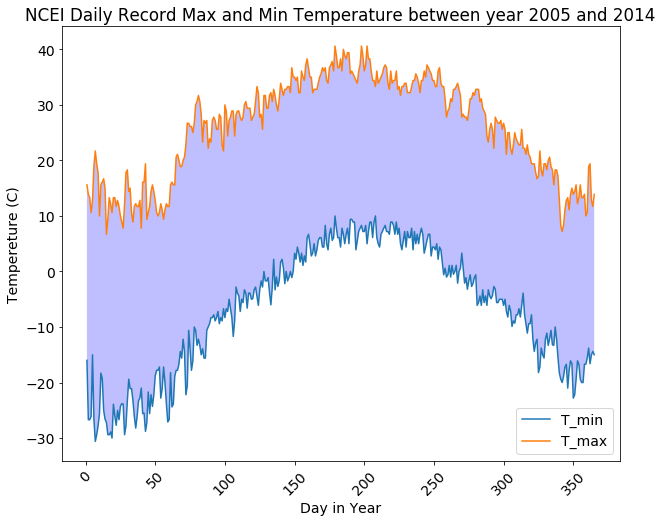

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
#plt.tick_params(labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Day in Year')
plt.ylabel('Tempereture (C)')
plt.title('NCEI Daily Record Max and Min Temperature between year 2005 and 2014')
xdate = list(range(1,366))
ymin = df_hw.groupby('MMDD')['TMIN'].min()/10 
ymax = df_hw.groupby('MMDD')['TMAX'].max()/10 
plt.plot(xdate, ymin, '-', xdate, ymax , '-')

plt.gca().fill_between(xdate, 
                      ymin, ymax, 
                      facecolor='blue', 
                      alpha=0.25)
# add a legend with legend entries
plt.legend(['T_min', 'T_max'], loc = 4)
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

#plt.show()

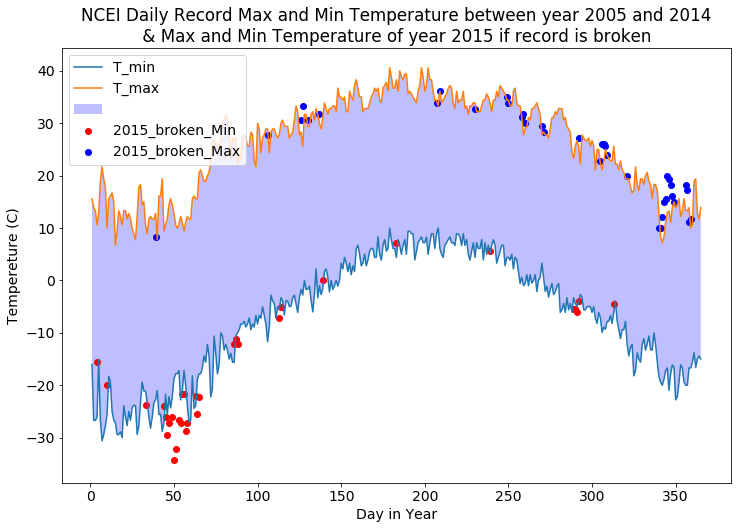

In [24]:
plt.figure(figsize=(12,8))
plt.xlabel('Day in Year')
plt.ylabel('Tempereture (C)')
plt.title('NCEI Daily Record Max and Min Temperature between year 2005 and 2014\n & Max and Min Temperature of year 2015 if record is broken ')
#xdate = list(range(1,366))
#ymin = df_hw.groupby('MMDD')['TMIN'].min()/10 
#ymax = df_hw.groupby('MMDD')['TMAX'].max()/10 
plt.plot(xdate, ymin, '-', xdate, ymax , '-')

plt.gca().fill_between(xdate, 
                      ymin, ymax, 
                      facecolor='blue', 
                      alpha=0.25)

# Max and Min temperature in year 2015
ymin_2015 = df_2015.groupby('MMDD')['TMIN'].min()/10 
ymax_2015 = df_2015.groupby('MMDD')['TMAX'].max()/10 

xdate_r, ymin_r = zip(*[(n, ymin_2015[n]) for n in range(365) if ymin_2015[n]< ymin[n]])
xdate_ri, ymax_r = zip(*[(n, ymax_2015[n]) for n in range(365) if ymax_2015[n]> ymax[n]])
# Plot the 2015 Temperatures that boken the record of 2004-2014
plt.scatter(xdate_r, ymin_r, color = 'red')
plt.scatter(xdate_ri, ymax_r, color = 'blue')
plt.legend(['T_min', 'T_max',"",'2015_broken_Min', '2015_broken_Max'], loc = 0)